In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Importing the training set 
data = pd.read_csv("train_set.csv")
dataset = data.iloc[:, 1:2].values

In [3]:
len(dataset)

1998

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(dataset)

In [5]:
# Creating a data structure with 60 timestens and 1 output
x_train = []
y_train = []

# Each time we split out 59 sample training data and 1 label data to train the model
# i.e. say we have nums from 1 to 6, we tell machine 1 to 5 and let machine guess what last num is,
#      if machine tells 6, which is correct, if not, then it is an error. 
for i in range(60, len(dataset)):
    x_train.append(training_set_scaled[i-60:i, 0]) 
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
# Importing Test data
dataset_test = pd.read_csv('test_set.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values # real_stock_price is the data we want to compare with

In [17]:
# Creating Test set
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
y_test = []
for i in range(60, 521):
    x_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
# Initialising the RNN 
rnn = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
rnn.add(Dropout(0.2)) # Randomly turn off 20% of the units to prevent overfitting

In [9]:
# Adding the Second LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [10]:
# Adding the Third LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [11]:
# Adding the Fourth LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.2))

In [12]:
# Adding output layer
rnn.add(Dense(units = 1))

In [13]:
# Compiling RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Fitting RNN and Start training
r = rnn.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/100
61/61 [==============================] - 10s 85ms/step - loss: 0.0650 - val_loss: 0.0021
Epoch 2/100
61/61 [==============================] - 4s 72ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 3/100
61/61 [==============================] - 4s 71ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 4/100
61/61 [==============================] - 4s 70ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 5/100
61/61 [==============================] - 4s 70ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 6/100
61/61 [==============================] - 4s 72ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 7/100
61/61 [==============================] - 4s 71ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 8/100
61/61 [==============================] - 4s 73ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 9/100
61/61 [==============================] - 4s 71ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 10/100
61/61 [==============================] - 4s 73ms/step - loss: 0.0028 - val_loss: 0.001

Epoch 80/100
61/61 [==============================] - 4s 69ms/step - loss: 9.6518e-04 - val_loss: 5.0542e-04
Epoch 81/100
61/61 [==============================] - 4s 72ms/step - loss: 8.7579e-04 - val_loss: 6.2036e-04
Epoch 82/100
61/61 [==============================] - 4s 69ms/step - loss: 7.9076e-04 - val_loss: 4.5055e-04
Epoch 83/100
61/61 [==============================] - 5s 75ms/step - loss: 7.8727e-04 - val_loss: 4.1904e-04
Epoch 84/100
61/61 [==============================] - 5s 79ms/step - loss: 7.8672e-04 - val_loss: 6.6088e-04
Epoch 85/100
61/61 [==============================] - 5s 85ms/step - loss: 7.8285e-04 - val_loss: 4.0603e-04
Epoch 86/100
61/61 [==============================] - 4s 70ms/step - loss: 7.9805e-04 - val_loss: 4.6090e-04
Epoch 87/100
61/61 [==============================] - 4s 72ms/step - loss: 7.5284e-04 - val_loss: 7.3477e-04
Epoch 88/100
61/61 [==============================] - 4s 67ms/step - loss: 7.5601e-04 - val_loss: 7.1481e-04
Epoch 89/100
61/61 

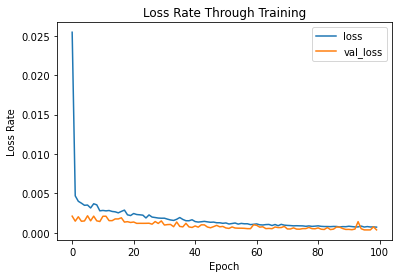

In [20]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss Rate Through Training")
plt.xlabel('Epoch')
plt.ylabel('Loss Rate')
plt.legend()
plt.show()

In [21]:
# Making Predictions 
predicted_stock_price = rnn.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

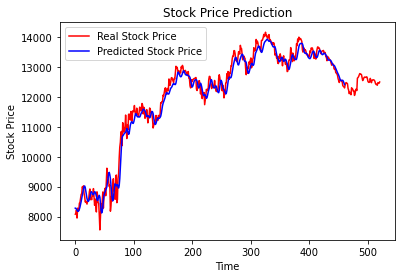

In [22]:
# Visualizing the results 
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title("Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()